<h1><center>Final Project:</center></h1>
<h1><center>Solving a Second Order Ordinary Differential Equation</center></h1>
<h2><center>Alisha Hodgin</center></h2>
<h4><center>University of Central Oklahoma, Department of Engineering and Physics</center></h4>
<h5><center>Computational Methods in Engineering, Fall 2021</center></h5>

## Importing Libraries for the Notebook & Defining Runge Kutta Constants

In [5]:
#IMPORT LIBRARIES
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#CLASSICAL RK CONSTANTS
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2 
a4 = 1
b21 = 1./2
b31 = 0
b32 = 1./2
b41 = 0
b42 = 0
b43 = 1

<h1><center>Part I</center></h1>

<h5><center> Write python code that uses RK 4th order to solve the ODE above. For the first part of the project, you will assume F(t) is zero. Later you will be using F(t), so plan accordingly.Test your code with all three unforced cases - overdamping, critically damped, and underdamping. You will choose the values of $\omega_n$ and $\zeta$. You will need to demonstrate your code works over a range of time-step sizes for all cases. Code and graphics are required. You should calculate and verify that both $x(t)$ and $v(t)$ can reliably be calculated using Runge-Kutta by numerically and graphically comparing the analytical solutions and the calculated values from your RK program.</center></h5>

## Overdamped, Homogenous System

CONDITIONS: 


- $\zeta > \sqrt{\zeta^2 - 1}$


- $c > c_c$ therefore $\zeta > 1$


- $ \frac{F(t)}{m} = 0$

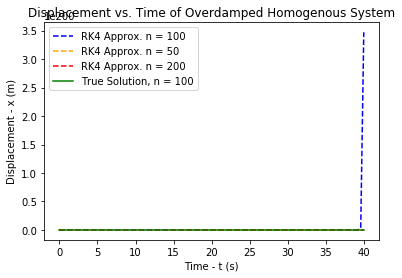

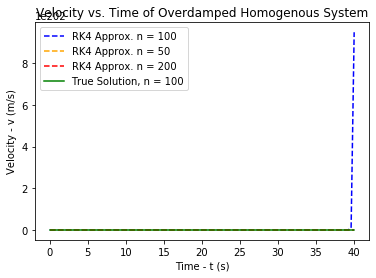

In [47]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = 10
wn = 1   #in rad/s

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: 0     

#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t
fv = lambda t,x,v: (Fom(t) - (2*zeta*wn*v) - (x*pow(wn,2)))


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m

#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 50
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 200
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
     
###########################################################################################################################
#EXACT SOLUTION
###########################################################################################################################
#FUNCTIONS
#x_t and v_t defined for x(0) = 1 and v(0) = 0
def x_t(lam1, lam2, t):
    diff1 = lam1 - lam2
    diff2 = lam2 - lam1
    diff3 = lam2 - (2*lam1)
    return (diff3/diff2)*exp(lam1*t) + (lam1/diff1)*exp(lam2*t)
def v_t(lam1, lam2, t):
    diff1 = lam1 - lam2
    diff2 = lam2 - lam1
    diff3 = lam2 - (2*lam1)
    prod1 = lam1*diff3
    prod2 = lam2*lam1
    return (prod1/diff2)*exp(lam1*t) + (prod2/diff1)*exp(lam2*t)

lam1 = -wn*(zeta - wn*sqrt(pow(zeta,2) - 1))
lam2 = -wn*(zeta + wn*sqrt(pow(zeta,2) - 1))

#INTIAL CONDITIONS
#set up arrays for storing values
x_TS = np.zeros(n1+1)
v_TS = np.zeros(n1+1)

#set initial values
x_TS[0] = xiv
v_TS[0] = viv

for j in range(1,n1+1):
    x_TS[j] = x_t(lam1,lam2,t[j-1])
    v_TS[j] = v_t(lam1,lam2,t[j-1])
    
###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
#x vs t
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t1,x_TS,c='green',linestyle='solid') #true solution
plt.title("Displacement vs. Time of Overdamped Homogenous System")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 100","RK4 Approx. n = 50","RK4 Approx. n = 200","True Solution, n = 100"],loc = "upper left")
plt.show()

#v vs t 
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t1,v_TS,c='green',linestyle='solid') #true solution
plt.title("Velocity vs. Time of Overdamped Homogenous System")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","RK4 Approx. n = 50","RK4 Approx. n = 200","True Solution, n = 100"],loc = "upper left")
plt.show()

## Critically Damped, Homogenous System

CONDITIONS: 


- $\sqrt{\zeta^2 - 1} = 0$


- $c = c_c$ therefore $\zeta = 1$


- $ \frac{F(t)}{m} = 0$

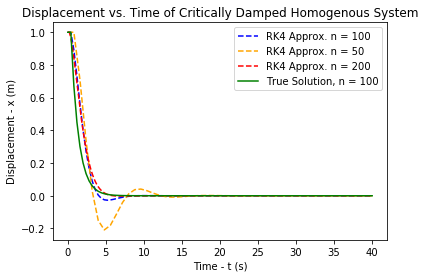

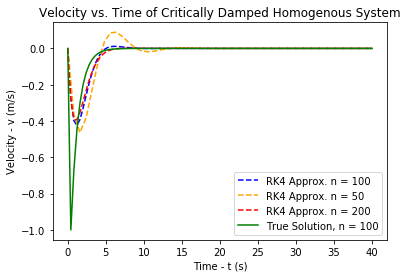

In [45]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = 1
wn = 1   #in rad/s

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: 0     

#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m
        
#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 50
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 200
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    
###########################################################################################################################
#EXACT SOLUTION
###########################################################################################################################
#FUNCTIONS
#x_t and v_t defined for x(0) = 1 and v(0) = 0
def x_t(wn,t):
    return exp(-wn*t)
def v_t(wn,t):
    return -wn*exp(-wn*t)

lam1 = -wn*(zeta - wn*sqrt(pow(zeta,2) - 1))
lam2 = -wn*(zeta + wn*sqrt(pow(zeta,2) - 1))

#INTIAL CONDITIONS
#set up arrays for storing values
x_TS = np.zeros(n1+1)
v_TS = np.zeros(n1+1)

#set initial values
x_TS[0] = xiv
v_TS[0] = viv

for j in range(1,n1+1):
    x_TS[j] = x_t(wn,t[j-1])
    v_TS[j] = v_t(wn,t[j-1])

###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
#x vs t
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t1,x_TS,c='green',linestyle='solid') #true solution
plt.title("Displacement vs. Time of Critically Damped Homogenous System")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 100","RK4 Approx. n = 50","RK4 Approx. n = 200","True Solution, n = 100"],loc = "upper right")
plt.show()

#v vs t 
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t1,v_TS,c='green',linestyle='solid') #true solution
plt.title("Velocity vs. Time of Critically Damped Homogenous System")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","RK4 Approx. n = 50","RK4 Approx. n = 200","True Solution, n = 100"],loc = "lower right")
plt.show()

## Underdamped, Homogenous System

CONDITIONS: 


- $\sqrt{\zeta^2 - 1} < 1$


- $c < c_c$ therefore $\zeta < 1$


- $\omega_d = \omega_n\sqrt{1-\zeta^2}$ therefore $\lambda = -\zeta w_n \pm i\omega_d$


- $ \frac{F(t)}{m} = 0$

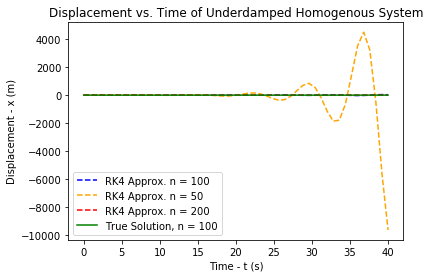

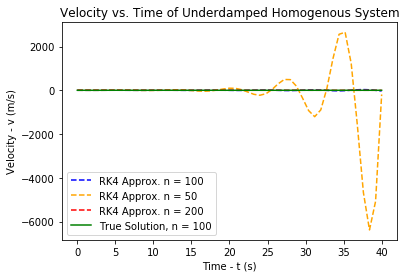

In [56]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = .1
wn = 1   #in rad/s
wd = wn*sqrt(1-pow(zeta,2)) #in rad/s

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: 0     

#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m
        
#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 50
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 200
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    
###########################################################################################################################
#EXACT SOLUTION
###########################################################################################################################
#FUNCTIONS
#x_t and v_t defined for x(0) = 1 and v(0) = 0
def x_t(zeta,wn,wd,t):
    ex = -zeta*wn*t
    arg = wd*t
    frac = zeta*(wn/wd)
    return exp(ex)*(cos(arg) + (frac*sin(arg)))
def v_t(zeta,wn,wd,t):
    ex = -zeta*wn*t
    arg = wd*t
    frac = zeta*(wn/wd)
    p1 = (-wd*sin(arg)) + (zeta*wn*cos(arg))
    p2 = frac*((wd*cos(arg)) - (zeta*wn*sin(arg)))
    return exp(ex)*(p1 + p2)

#INTIAL CONDITIONS
#set up arrays for storing values
x_TS = np.zeros(n1+1)
v_TS = np.zeros(n1+1)

#set initial values
x_TS[0] = xiv
v_TS[0] = viv

for j in range(1,n1+1):
    x_TS[j] = x_t(zeta,wn,wd,t[j-1])
    v_TS[j] = v_t(zeta,wn,wd,t[j-1])

###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
#x vs t
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t1,x_TS,c='green',linestyle='solid') #true solution
plt.title("Displacement vs. Time of Underdamped Homogenous System")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 100","RK4 Approx. n = 50","RK4 Approx. n = 200","True Solution, n = 100"],loc = "lower left")
plt.show()

#v vs t 
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t1,v_TS,c='green',linestyle='solid') #true solution
plt.title("Velocity vs. Time of Underdamped Homogenous System")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","RK4 Approx. n = 50","RK4 Approx. n = 200","True Solution, n = 100"],loc = "lower left")
plt.show()